In [1]:


P = "/home/shussain/Simulated_data/simulations_outputs_set_3"
dsets = sorted_listdir(P)

sizes = [1000, 750, 500, 250, 100, 50, 20, 10, 5]

dset = get_dsets_(f"{P}/simulation_output2")

cor_X = np.corrcoef(dset["X_train"], rowvar=False)

cors = []
latent = []

for size in tqdm(sizes):
    hist, model = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[size], input_shape=1000, reconstruction_weight=0, dropout=False, activation="relu")
    enc = tf.keras.Sequential(
    model.layers[:2]
    )
    enc.compile()
    
    lat = enc(dset["X_train"])
              
    cor = np.corrcoef(lat, rowvar=False)
    cor = np.nan_to_num(cor)
    
    
    latent.append(lat)
    cors.append(cor)
    
    
   
    

  0%|          | 0/9 [00:00<?, ?it/s]

/home/shussain/Simulated_data/simulations_outputs_set_3/simulation_output2 True


/home/shussain/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/shussain/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 9/9 [03:01<00:00, 20.19s/it]


In [3]:
from FADS_SRP.models import compiled_autoencoder, supervised_autoencoder
from FADS_SRP.input import sorted_listdir, get_dsets_
from time import sleep
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


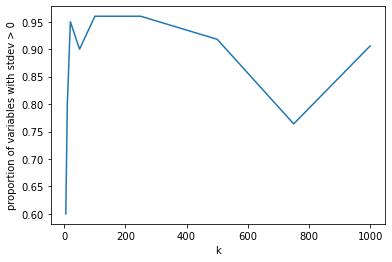

In [2]:
plt.plot(
    sizes,
    [sum([np.std(c[:, i]) != 0 for i in range(c.shape[1])])/c.shape[1] for c in latent]
)

plt.xlabel("k")
plt.ylabel("proportion of variables with stdev > 0")
plt.savefig("stdev.jpeg")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-5.0000000e-01, -4.0000001e-01, -3.0000001e-01, -2.0000000e-01,
        -1.0000000e-01,  2.7415026e-10,  1.0000000e-01,  2.0000000e-01,
         3.0000001e-01,  4.0000001e-01,  5.0000000e-01], dtype=float32),
 <BarContainer object of 10 artists>)

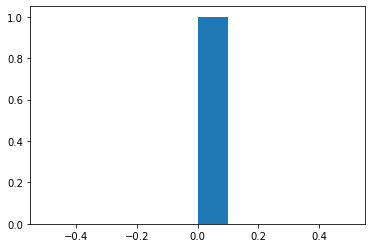

In [4]:
c = latent[0]
plt.hist([np.std(c[:, i]) for i in range(c.shape[1])])

In [ ]:
t = latent[0].numpy()

plt.hist([sum() for i in range(1000)])

In [ ]:
t[:, 1]

(array([7.51800e+03, 3.45308e+05, 5.89034e+05, 5.68900e+04, 2.50000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+03]),
 array([-0.2814898 , -0.15334082, -0.02519184,  0.10295714,  0.23110612,
         0.3592551 ,  0.48740408,  0.61555306,  0.74370204,  0.87185102,
         1.        ]),
 <BarContainer object of 10 artists>)

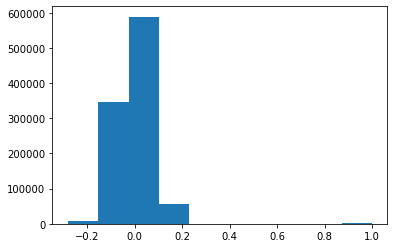

In [5]:
import matplotlib.pyplot as plt

plt.hist(cor_X.ravel())

In [ ]:
plt.hist(cors[0].ravel())

In [6]:
P = "/home/shussain/Simulated_data/simulations_outputs_set_3"
dsets = sorted_listdir(P)

sizes = [1000, 750, 500, 250, 100, 50, 20, 10, 5]

dset = get_dsets_(f"{P}/simulation_output2")


cor_X = np.corrcoef(dset["X_train"], rowvar=False)

for rw in tqdm([0.2, 0.6, 1], desc="outer"):
    cors = []
    latent = []

    for k in tqdm(sizes, desc="inner"):
        pca = PCA(n_components=k)
        pca_out_train = pca.fit_transform(dset["X_train"])
        pca_out_test = pca.transform(dset["X_test"])
        
        cor = np.corrcoef(pca_out_test, rowvar=False)
        cor = np.nan_to_num(cor)

        latent.append(lat)
        cors.append(cor)
    """
    df = {f"{k}": c for k, c in zip(sizes, cors)}
    
    gs_kw = dict(width_ratios=[1, 1, 1, 0.1], height_ratios=[1, 1, 1])

    fig, axes = plt.subplots(3, 4, figsize=(10, 10), constrained_layout=True, gridspec_kw=gs_kw)

    gs = axes[0, -1].get_gridspec()

    for ax in axes[:, -1]:
        ax.remove()

    axbig = fig.add_subplot(gs[:, -1])    

    for ax, key in zip(axes[:, :3].ravel(), df.keys()):
        ret = ax.imshow(df[key], vmin=0, vmax=1)
        ax.set_title(key)
    """
    plt.colorbar(ret, cax=axbig)
    #plt.savefig(f"cov/pca.jpeg")

outer:   0%|          | 0/3 [00:00<?, ?it/s]


ValueError: n_components=1000 must be between 0 and min(n_samples, n_features)=240 with svd_solver='full'

In [22]:
sns.set_theme(context='paper', style="white", font_scale=3)

outer: 100%|██████████| 3/3 [09:16<00:00, 185.41s/it]


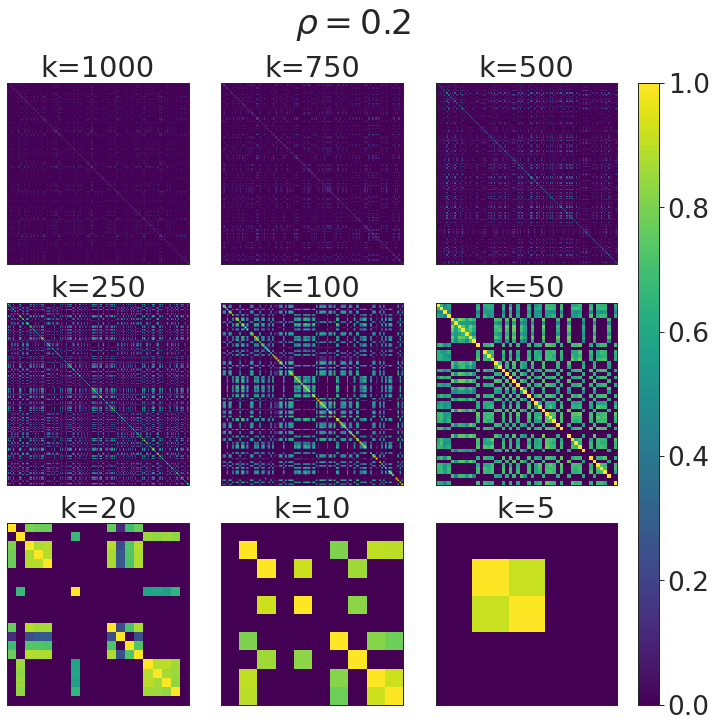

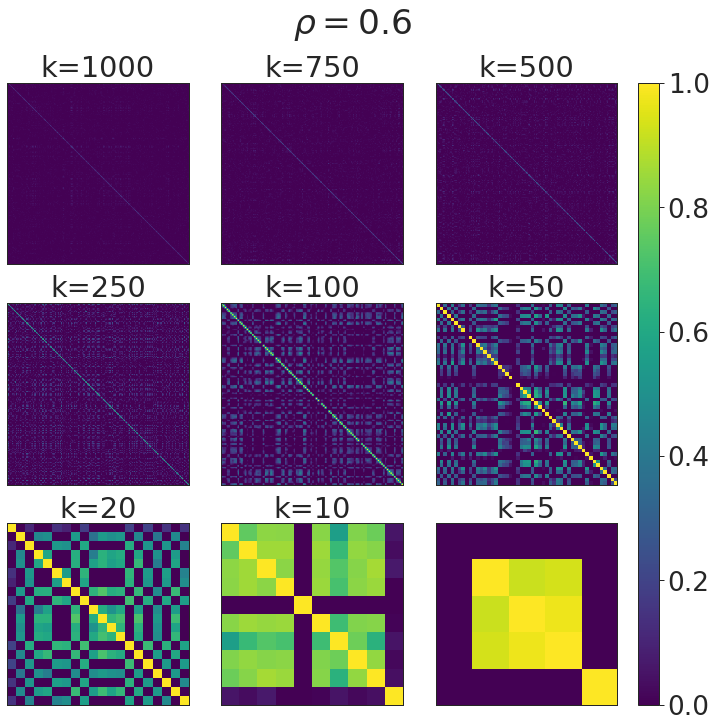

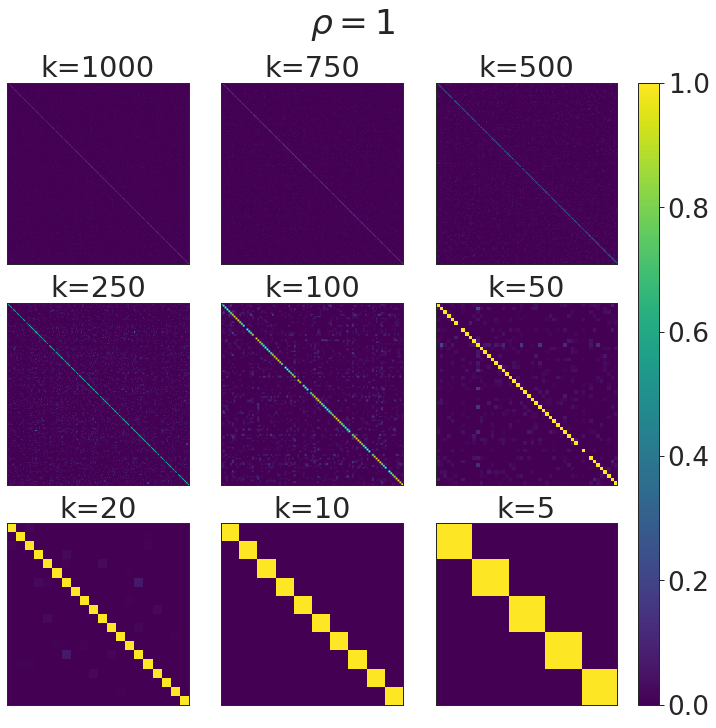

In [29]:
P = "/home/shussain/Simulated_data/simulations_outputs_set_3"
dsets = sorted_listdir(P)

sizes = [1000, 750, 500, 250, 100, 50, 20, 10, 5]

dset = get_dsets_(f"{P}/simulation_output2")


cor_X = np.corrcoef(dset["X_train"], rowvar=False)

for rw in tqdm([0.2, 0.6, 1], desc="outer"):
    cors = []
    latent = []

    for size in tqdm(sizes, desc="inner"):
        hist, model = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[size], 
                                             input_shape=1000, reconstruction_weight=rw, dropout=False, activation="relu")
        enc = tf.keras.Sequential(
        model.layers[:2]
        )
        enc.compile()

        lat = enc(dset["X_train"])

        cor = np.corrcoef(lat, rowvar=False)
        cor = np.nan_to_num(cor)

        latent.append(lat)
        cors.append(cor)
    
    df = {f"{k}": c for k, c in zip(sizes, cors)}
    
    gs_kw = dict(width_ratios=[1, 1, 1, 0.1], height_ratios=[1, 1, 1])

    fig, axes = plt.subplots(3, 4, figsize=(10, 10), constrained_layout=True, gridspec_kw=gs_kw)
    fig.suptitle(f"$\\rho={rw}$")
    gs = axes[0, -1].get_gridspec()

    for ax in axes[:, -1]:
        ax.remove()

    axbig = fig.add_subplot(gs[:, -1])    

    for ax, key in zip(axes[:, :3].ravel(), df.keys()):
        ret = ax.imshow(df[key], vmin=0, vmax=1, cmap="viridis")
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

        ax.set_title(f"k={key}")
    
    plt.colorbar(ret, cax=axbig)
    plt.savefig(f"cov/relu/cov_rw{rw}.jpeg")
    


In [14]:
X = np.diag([1]*20)
X

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

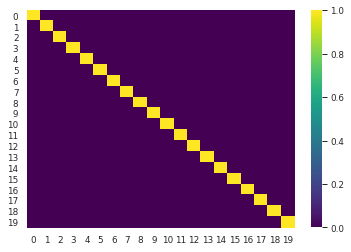

In [21]:
import seaborn as sns 
sns.set_theme(context='paper')
sns.heatmap(X, cmap="viridis")


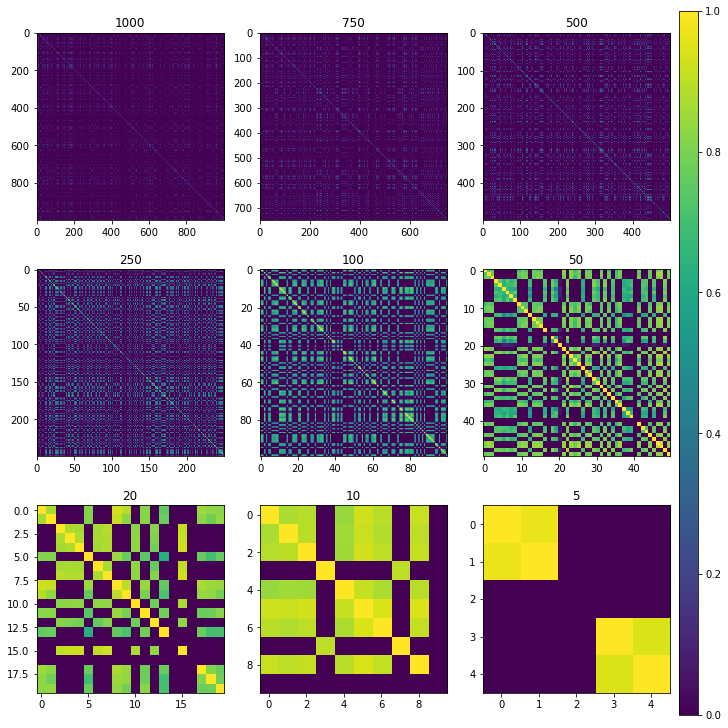

In [31]:
df = {f"{k}": c for k, c in zip(sizes, cors)}


gs_kw = dict(width_ratios=[1, 1, 1, 0.1], height_ratios=[1, 1, 1])

fig, axes = plt.subplots(3, 4, figsize=(10, 10), constrained_layout=True, gridspec_kw=gs_kw)

gs = axes[0, -1].get_gridspec()

for ax in axes[:, -1]:
    ax.remove()

axbig = fig.add_subplot(gs[:, -1])    

for ax, key in zip(axes[:, :3].ravel(), df.keys()):
    ret = ax.imshow(df[key], vmin=0, vmax=1)
    ax.set_title(key)
    
plt.colorbar(ret, cax=axbig)
plt.savefig("cov_rw0.0.jpeg")

In [ ]:
axes